In [1]:
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.01*t_u   #originally 0.1 but this was to high

In [3]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [5]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)      

In [10]:
epoch_store =[]
loss_store = []

In [12]:
def training_loop(n_epochs, params, t_u, t_c, optimizer, epoch_store, loss_store):
    for epoch in range(1, n_epochs +1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            epoch_store.append(epoch)
            loss_store.append(float(loss))
    
    return params, epoch_store, loss_store

In [7]:
#t_p = model(t_u, *params)
#loss = loss_fn(t_p, t_c)
#loss.backward()
#optimizer.step()
#params

In [14]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c,
    epoch_store = epoch_store,
    loss_store = loss_store)

Epoch 500, Loss 2.098804
Epoch 1000, Loss 2.094352
Epoch 1500, Loss 2.092352
Epoch 2000, Loss 2.091455
Epoch 2500, Loss 2.091049
Epoch 3000, Loss 2.090870
Epoch 3500, Loss 2.090787
Epoch 4000, Loss 2.090750
Epoch 4500, Loss 2.090734
Epoch 5000, Loss 2.090727


(tensor([ 24.6962,  28.3510, -10.6298], requires_grad=True),
 [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
 [2.098804473876953,
  2.0943520069122314,
  2.0923516750335693,
  2.0914547443389893,
  2.0910494327545166,
  2.090869665145874,
  2.090786933898926,
  2.090749979019165,
  2.0907344818115234,
  2.0907270908355713])

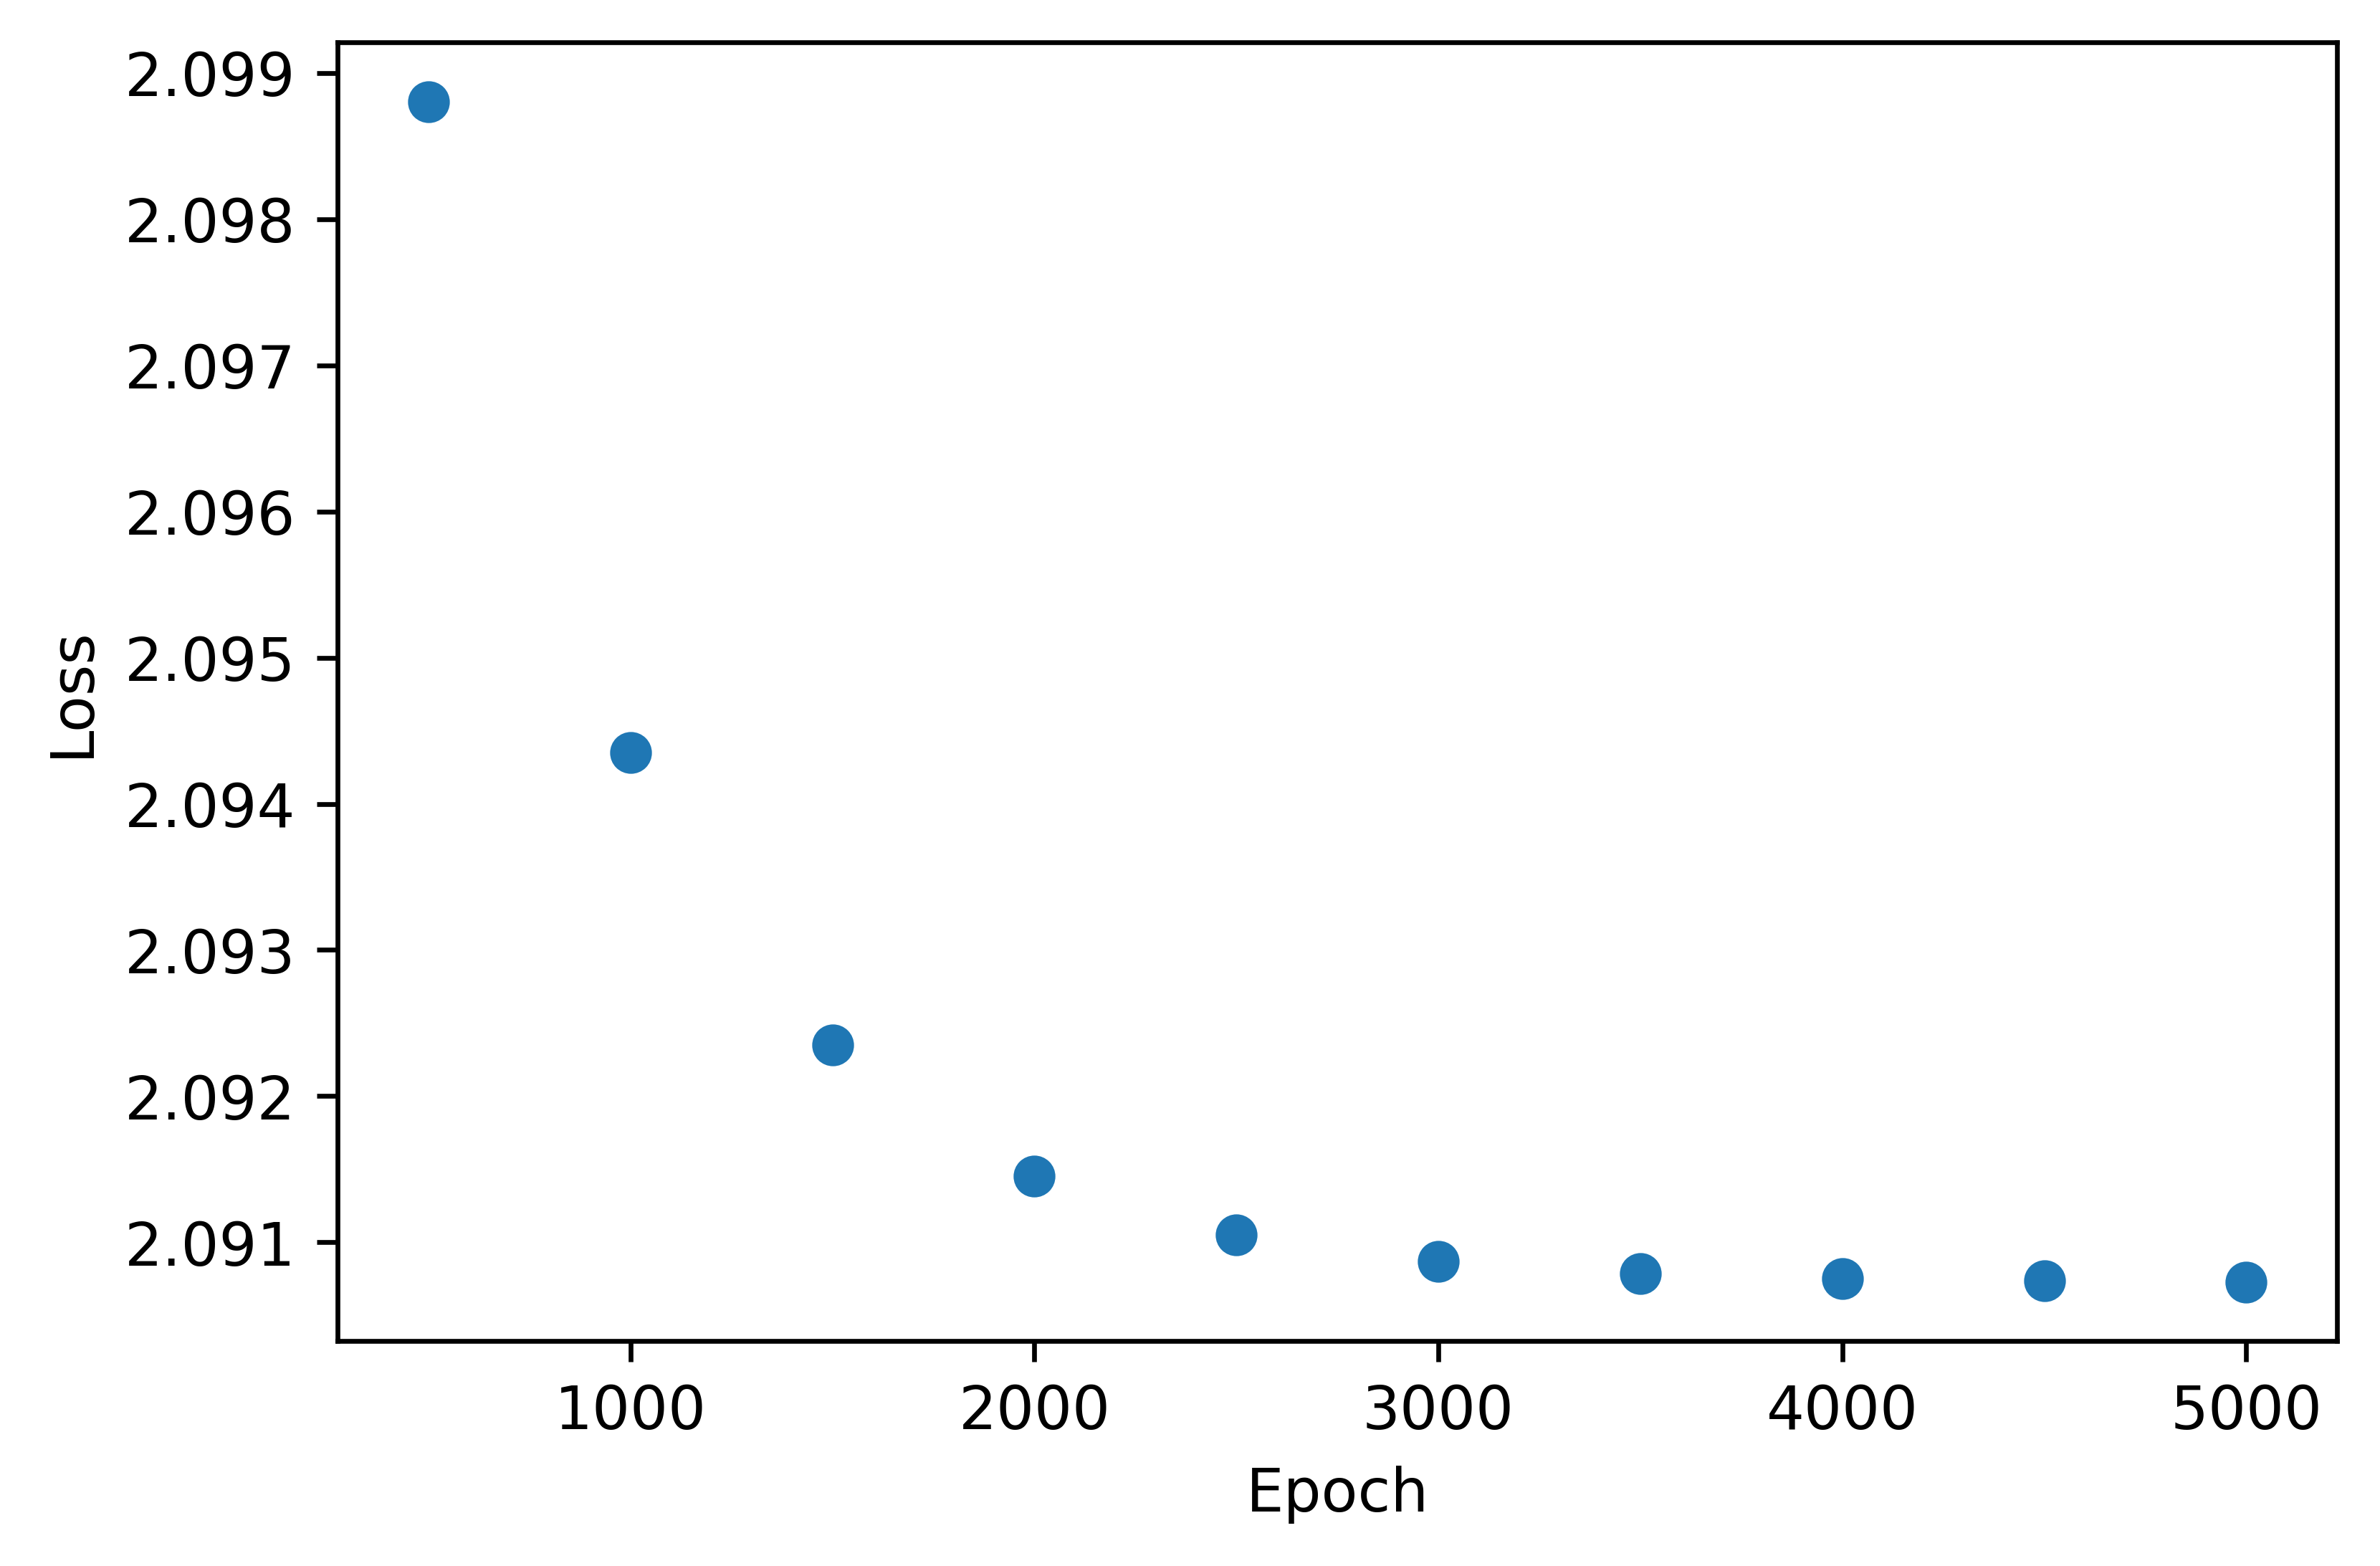

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epoch_store, loss_store, 'o')
